In [8]:
import numpy as np

In [9]:
import nidaqmx
import nidaqmx.stream_writers
import nidaqmx.system
from nidaqmx.types import CtrTime

In [10]:
system = nidaqmx.system.System.local()

In [11]:
system.driver_version

DriverVersion(major_version=18, minor_version=5, update_version=0)

In [12]:
for device in system.devices:
    print(device)

Device(name=Dev1)


In [13]:
# https://stackoverflow.com/questions/49951166/nidaqmx-co-channels-cant-write-sample
# https://github.com/ni/nidaqmx-python/blob/master/nidaqmx/_task_modules/co_channel_collection.py#L160

In [14]:
import matplotlib.pyplot as plt

In [15]:
def sine_signal(A=5, f=10, phi=0, n_sec=1, sample_factor=64):
    """
    f = frequency in Hz
    sample_factor should be well over nyquist limit (2)
    """
    
    rate = f*sample_factor # samples per channel per second
    n_samples = n_sec * rate
    t = np.linspace(0, n_sec, n_samples)
    
    signal = A*np.sin(2*np.pi*f*t + phi)
    
    return t, signal, rate, n_samples

def constant_signal(A=6, n_sec=0.010, sample_factor=64):
    n_samples = 1
    t = np.linspace(0, n_sec, n_samples)
    
    signal = A*np.ones_like(t)
    
    return t, signal, rate, n_samples

In [16]:
def scanner_custom_signal(samples_x, samples_y, rate=100, timeout_sec=10):
    with nidaqmx.Task() as task:
        task.ao_channels.add_ao_voltage_chan("Dev1/ao0")
        task.ao_channels.add_ao_voltage_chan("Dev1/ao1")
        task.timing.cfg_samp_clk_timing(
            rate,
            sample_mode=nidaqmx.constants.AcquisitionType.CONTINUOUS,
            samps_per_chan=len(samples)
        )
        writer = nidaqmx.stream_writers.AnalogMultiChannelWriter(task.out_stream, auto_start=True)
        print(np.array([
            samples_x, # x galvo, first mirror
            samples_y # y galvo, second mirror
        ]))
        writer.write_many_sample(np.array([
            samples_x, # x galvo, first mirror
            samples_y # y galvo, second mirror
        ]))
        task.wait_until_done(timeout=timeout_sec)

        task.stop()
        task.close()
        task.start()

def scanner_parkbeam(Ax=0, Ay=0, timeout_sec=1):
    
    with nidaqmx.Task() as task:
        task.ao_channels.add_ao_voltage_chan("Dev1/ao0")
        task.ao_channels.add_ao_voltage_chan("Dev1/ao1")
        # task.timing.cfg_samp_clk_timing(
        #     rate,
        #     sample_mode=nidaqmx.constants.AcquisitionType.CONTINUOUS,
        #     samps_per_chan=len(samples)
        # )
        writer = nidaqmx.stream_writers.AnalogMultiChannelWriter(task.out_stream, auto_start=True)
        writer.write_one_sample(np.array([
            np.float64(Ax), # x galvo, first mirror
            np.float64(Ay) # y galvo, second mirror
        ]))
        task.wait_until_done(timeout=timeout_sec)

        # task.stop()
        # task.close()
        task.start()
    # scanner_custom_signal(
    #     np.array([Ax,Ax], dtype=np.float64),
    #     np.array([Ay,Ay], dtype=np.float64),
    #     rate=100
    # )

In [17]:
scanner_parkbeam(Ax=0,Ay=0)

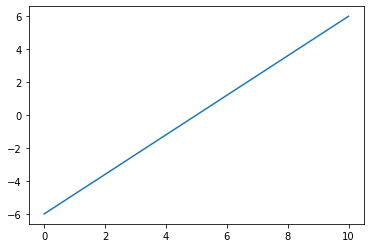

In [14]:
A = 6
n_sec = 10
rate = 100 # samples per channel per second
n_samples = n_sec * rate
nphi1 = 256
nphi2 = 256
dphi1 = 0.1
dphi2 = 0.1
t = np.linspace(0, n_sec, n_samples)

x = np.linspace(-A, A, n_samples)

plt.plot(t, x)

In [66]:
t, samples, rate, n_samples = sine_signal(A=6, f=3)
move_scanner_custom_signal(samples, rate, timeout_sec=60)

DaqError: Wait Until Done did not indicate that the task was done within the specified timeout.

Increase the timeout, check the program, and make sure connections for external timing and triggering are in place.
Task Name: _unnamedTask<39>

Status Code: -200560

In [63]:
with nidaqmx.Task() as task_movescanner:
    t, samples, rate, n_samples = sine_signal(A=6, f=1)
    # plt.plot(t, samples)
    # plt.show()
    # t, samples, rate, n_samples = constant_signal(A=0)
    
    # # for bh trigger
    # task.co_channels.add_co_pulse_chan_time(counter="Dev2/ctr1", low_time=0.010, high_time=0.010)
    
    # task.ao_channels.add_ao_func_gen_chan("Dev2/ao1", freq=10.0, amplitude=1.0)
    task_movescanner.ao_channels.add_ao_voltage_chan("Dev1/ao0")
    task_movescanner.ao_channels.add_ao_voltage_chan("Dev1/ao1")
    task_movescanner.timing.cfg_samp_clk_timing(rate, sample_mode=nidaqmx.constants.AcquisitionType.CONTINUOUS, samps_per_chan=len(samples))
    writer_movescanner = nidaqmx.stream_writers.AnalogMultiChannelWriter(task_movescanner.out_stream, auto_start=True)
    writer_movescanner.write_many_sample(np.array([
        samples, # x galvo, first mirror
        samples # y galvo, second mirror
    ]))
    task_movescanner.wait_until_done(timeout=10)
    
    task_movescanner.stop()
    task_movescanner.close()
    
    task_movescanner.start()

DaqError: Wait Until Done did not indicate that the task was done within the specified timeout.

Increase the timeout, check the program, and make sure connections for external timing and triggering are in place.
Task Name: _unnamedTask<37>

Status Code: -200560